In [127]:
#coffe1league

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Make sure these two dependencies are available; if not, run the statements below to download
#nltk.download('stopwords')
#nltk.download('punkt')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


import os
from pandas import ExcelWriter
from pandas import ExcelFile

from collections import Counter


In [70]:
df = pd.read_excel('The_New_York_Post_Dec_10_2017_until_May_31_2015_copy.xlsx')

In [71]:
df.head()

,BYLINE,DATE,YEAR,DAY,HEADLINE,LENGTH,PUBLICATION,SECTION,CITY
0,Carleton English,2017-12-08,2017,Friday,Bitcoin on a Bender $tupefying ascent,425 words,The New York Post,All Editions; Pg. 35,NYC
1,Post staff,2017-12-05,2017,Tuesday,Bitcoin billionaires in a 'Winkle',256 words,The New York Post,All Editions; Pg. 49,NYC
2,Ed Zwirn,2017-12-03,2017,Sunday,He's bitcoining it in Investors devoted to cry...,619 words,The New York Post,All Editions; Pg. 53,NYC
3,NaN,2017-12-03,2017,Sunday,Put more nickels in Azoff case could bring mor...,710 words,The New York Post,All Editions; Pg. 54,NYC
4,NaN,2017-12-03,2017,Sunday,Katy Perry posts on Buffet-bitcoin investing,106 words,The New York Post,All Editions; Pg. 54,NYC


In [47]:
#https://stackoverflow.com/questions/22303554/words-frequency-using-pandas-and-matplotlib
# Read CSV file, get author names and counts.
#df = pd.read_csv("books.csv", index_col="id")
#df['x'].str.lower()
counter = Counter(df['BYLINE'].str.lower())
author_names = counter.keys()
author_counts = counter.values()
(author_names,author_counts)

(dict_keys(['carleton english  ', 'post staff  ', 'ed zwirn  ', nan, 'kevin dugan  ', 'compiled by seth mandel  ', 'kaja whitehouse  ', 'nicolas vega  ', 'john crudele  ', 'maureen callahan  ', 'ap, dow jones, reuters and post wires  ', 'emily saul  ', 'laura italiano  ', 'laura italiano and laura italiano  ', 'ian mohr  ', 'michael gray  ', 'danika fears  ', 'lia eustachewich  ', 'and  ', 'david k. li  ', 'james covert  ', 'claire atkinson  ', 'kevin dugan , priscilla degregory and bob fredericks  ', 'jane ridley  ', 'richard morgan  ', 'aaron feis  ']),
 dict_values([3, 5, 2, 5, 19, 1, 2, 1, 6, 1, 2, 1, 5, 1, 1, 3, 1, 2, 2, 1, 5, 2, 1, 1, 1, 1]))

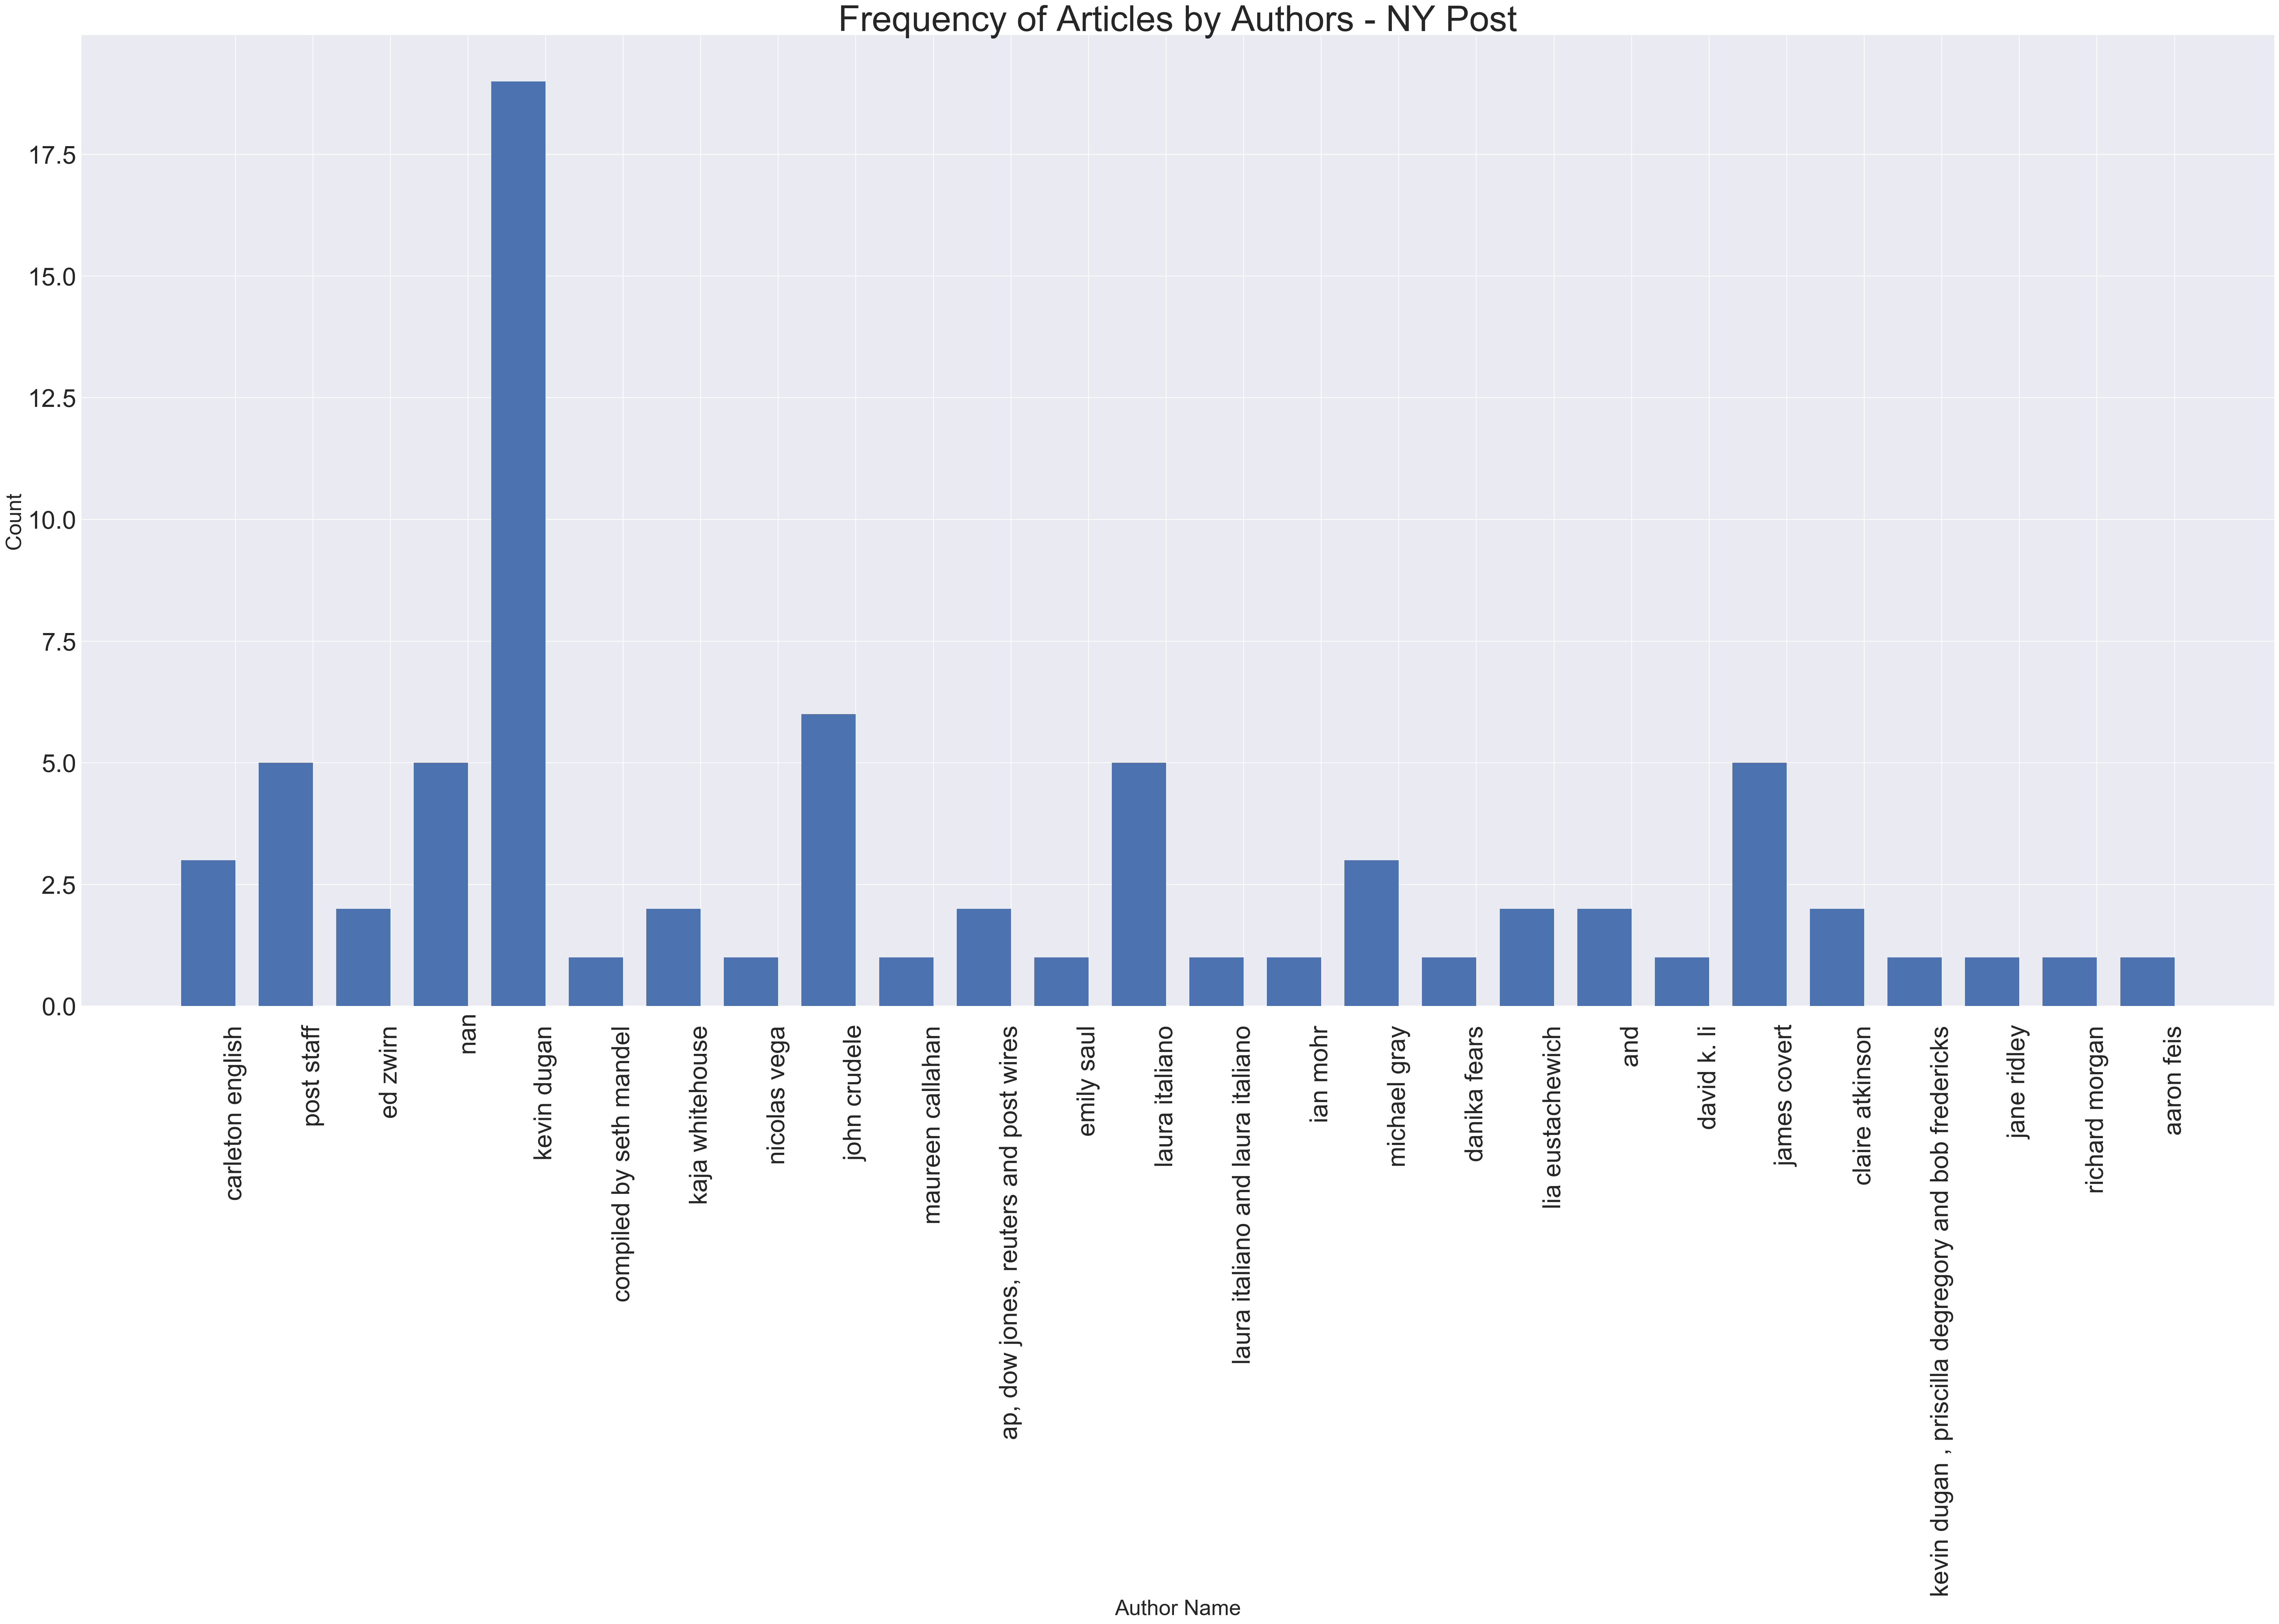

In [72]:
# Plot histogram using matplotlib bar().
plt.figure(figsize=(55,25))
#plt.rcParams.update({'font.size': 35})
#label_size = 26
#plt.rcParams['xtick.labelsize'] = label_size 
#plt.rcParams['ytick.labelsize'] = label_size 
plt.tick_params(labelsize=35)
indexes = np.arange(len(author_names))
width = .7
plt.bar(indexes, author_counts, width)
plt.xticks(indexes + width * 0.5, author_names,  rotation='vertical')
plt.xlabel('Author Name', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.title('Frequency of Articles by Authors - NY Post', fontsize=50)
plt.show()

In [74]:
 df['DATE'].dtype

dtype('<M8[ns]')

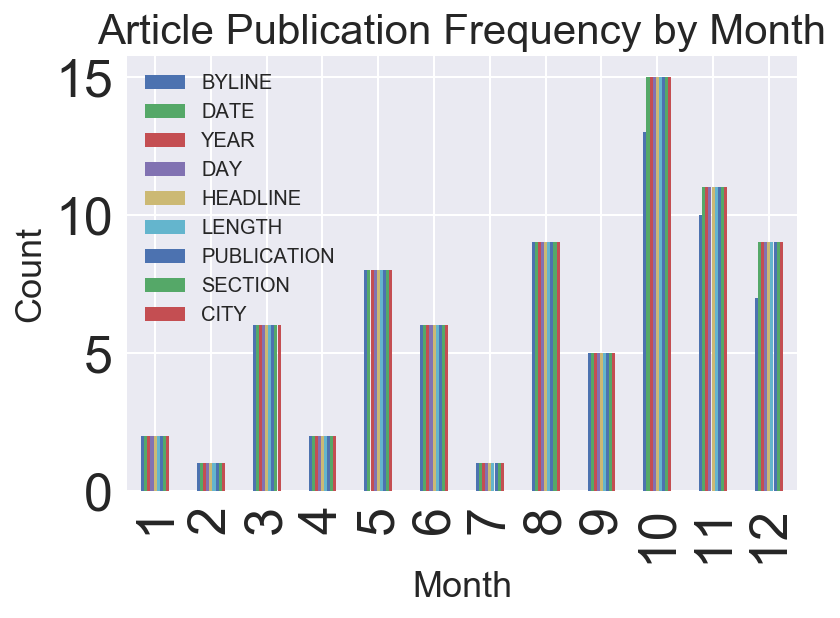

In [80]:
#df["DATE"] = df["DATE"].astype("datetime64")
#To show the count of dates by month:

df.groupby(df['DATE'].dt.month).count().plot(kind="bar")
plt.xlabel('Month', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Article Publication Frequency by Month', fontsize=21)

In [96]:
# this plot is indicates there is greater number of "bitcoin" articles in the 3rd quarter as compared to prior months. 
#DataFrame.hist(data, column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, **kwds

#df.groupby(["item", "color"])["id"].count().reset_index(name="count")
df1 = df.groupby(df["DATE"].dt.month).count()

new = old.filter(['A','B','D'], axis=1)
#    item  color  count
#0    car  black      2
##1  truck   blue      1
#2  truck    red      2
df1.head()
df1 = df1.drop ['DATE', 'YEAR', 'DAY', 'LENGTH', 'PUBLICATION', 'CITY']

TypeError: 'method' object is not subscriptable

In [156]:
#new = old[['A', 'C', 'D']].copy()
#DATE here is the month in which a publication was published 
df1 = df[[ 'BYLINE']].copy()
df1 = df1.groupby(df["DATE"].dt.month).count()
df1

,BYLINE
DATE,
1,2
2,1
3,6
4,2
5,8
6,6
7,1
8,9
9,5


In [151]:
 
df2 = df[ df["DATE"].dt.month >9 ] 

df2


,BYLINE,DATE,YEAR,DAY,HEADLINE,LENGTH,PUBLICATION,SECTION,CITY
0,Carleton English,2017-12-08,2017,Friday,Bitcoin on a Bender $tupefying ascent,425 words,The New York Post,All Editions; Pg. 35,NYC
1,Post staff,2017-12-05,2017,Tuesday,Bitcoin billionaires in a 'Winkle',256 words,The New York Post,All Editions; Pg. 49,NYC
2,Ed Zwirn,2017-12-03,2017,Sunday,He's bitcoining it in Investors devoted to cry...,619 words,The New York Post,All Editions; Pg. 53,NYC
3,NaN,2017-12-03,2017,Sunday,Put more nickels in Azoff case could bring mor...,710 words,The New York Post,All Editions; Pg. 54,NYC
4,NaN,2017-12-03,2017,Sunday,Katy Perry posts on Buffet-bitcoin investing,106 words,The New York Post,All Editions; Pg. 54,NYC
5,Kevin Dugan,2017-11-29,2017,Wednesday,Bitcoin an explosive love affair: trader,202 words,The New York Post,Sports+Late City Final; Pg. 31,NYC
6,Kevin Dugan,2017-11-28,2017,Tuesday,A cryptic square Bitcoin nears $10K but paymen...,334 words,The New York Post,Sports+Late City Final; Pg. 49,NYC
7,Compiled by Seth Mandel,2017-11-28,2017,Tuesday,FAST TAKES,705 words,The New York Post,All Editions; Pg. 27,NYC
8,Kevin Dugan,2017-11-22,2017,Wednesday,"Absent shocks, stocks rock 'n' roll",354 words,The New York Post,Sports+Late City Final; Pg. 29,NYC
9,Kaja Whitehouse,2017-11-22,2017,Wednesday,Crack in HBO hack Iranian is ID'd,332 words,The New York Post,Sports+Late City Final; Pg. 17,NYC


In [152]:
df2.shape

(35, 9)

In [153]:
df3 = df2[[ 'YEAR', 'HEADLINE']].copy()
df3 = df3.groupby(df3["YEAR"]).count()
df3

,HEADLINE
YEAR,
2015,7
2016,2
2017,26


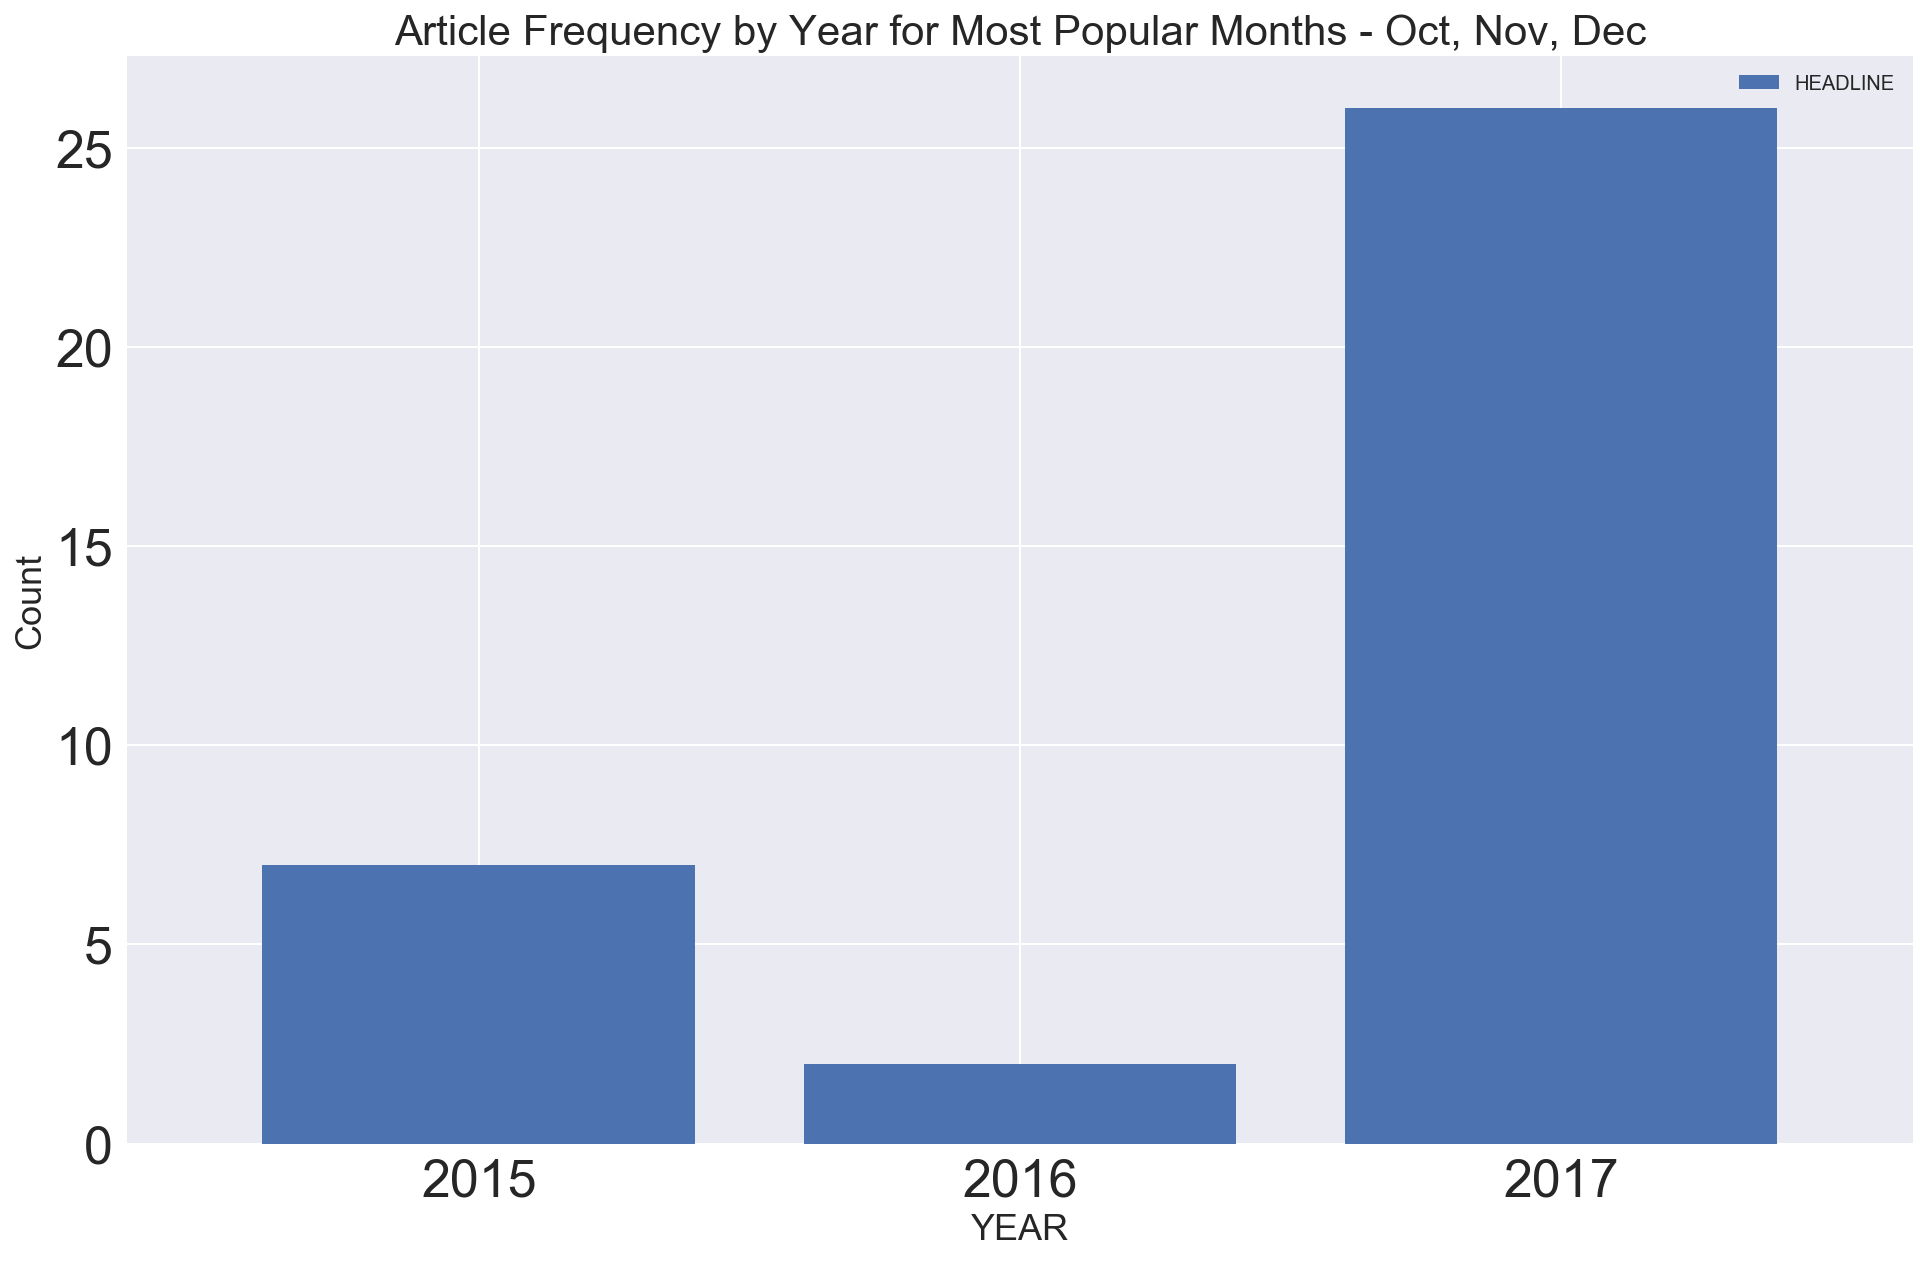

In [154]:
df3.plot.bar(rot=0, figsize=(16,10), width=0.8)

plt.xlabel('YEAR', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Article Frequency by Year for Most Popular Months - Oct, Nov, Dec', fontsize=21)

In [119]:
top_N = 4
#if not necessary all lower
a = df['HEADLINE'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)
#<FreqDist with 17 samples and 20 outcomes>

#rslt = pd.DataFrame(word_dist.most_common(top_N),
#                    columns=['Word', 'Frequency'])
#print(rslt)
#      Word  Frequency
#0  society          3
#1      ltd          2
#2      the          1
#3       co          1

#a = df['HEADLINE'].str.lower().str.cat(sep=' ')


<FreqDist with 382 samples and 644 outcomes>


In [120]:
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)

      Word  Frequency
0  bitcoin         29
1        '         18
2        a         16
3       's         16


         Frequency
Word              
bitcoin         29
'                5
ransom           5
&                4


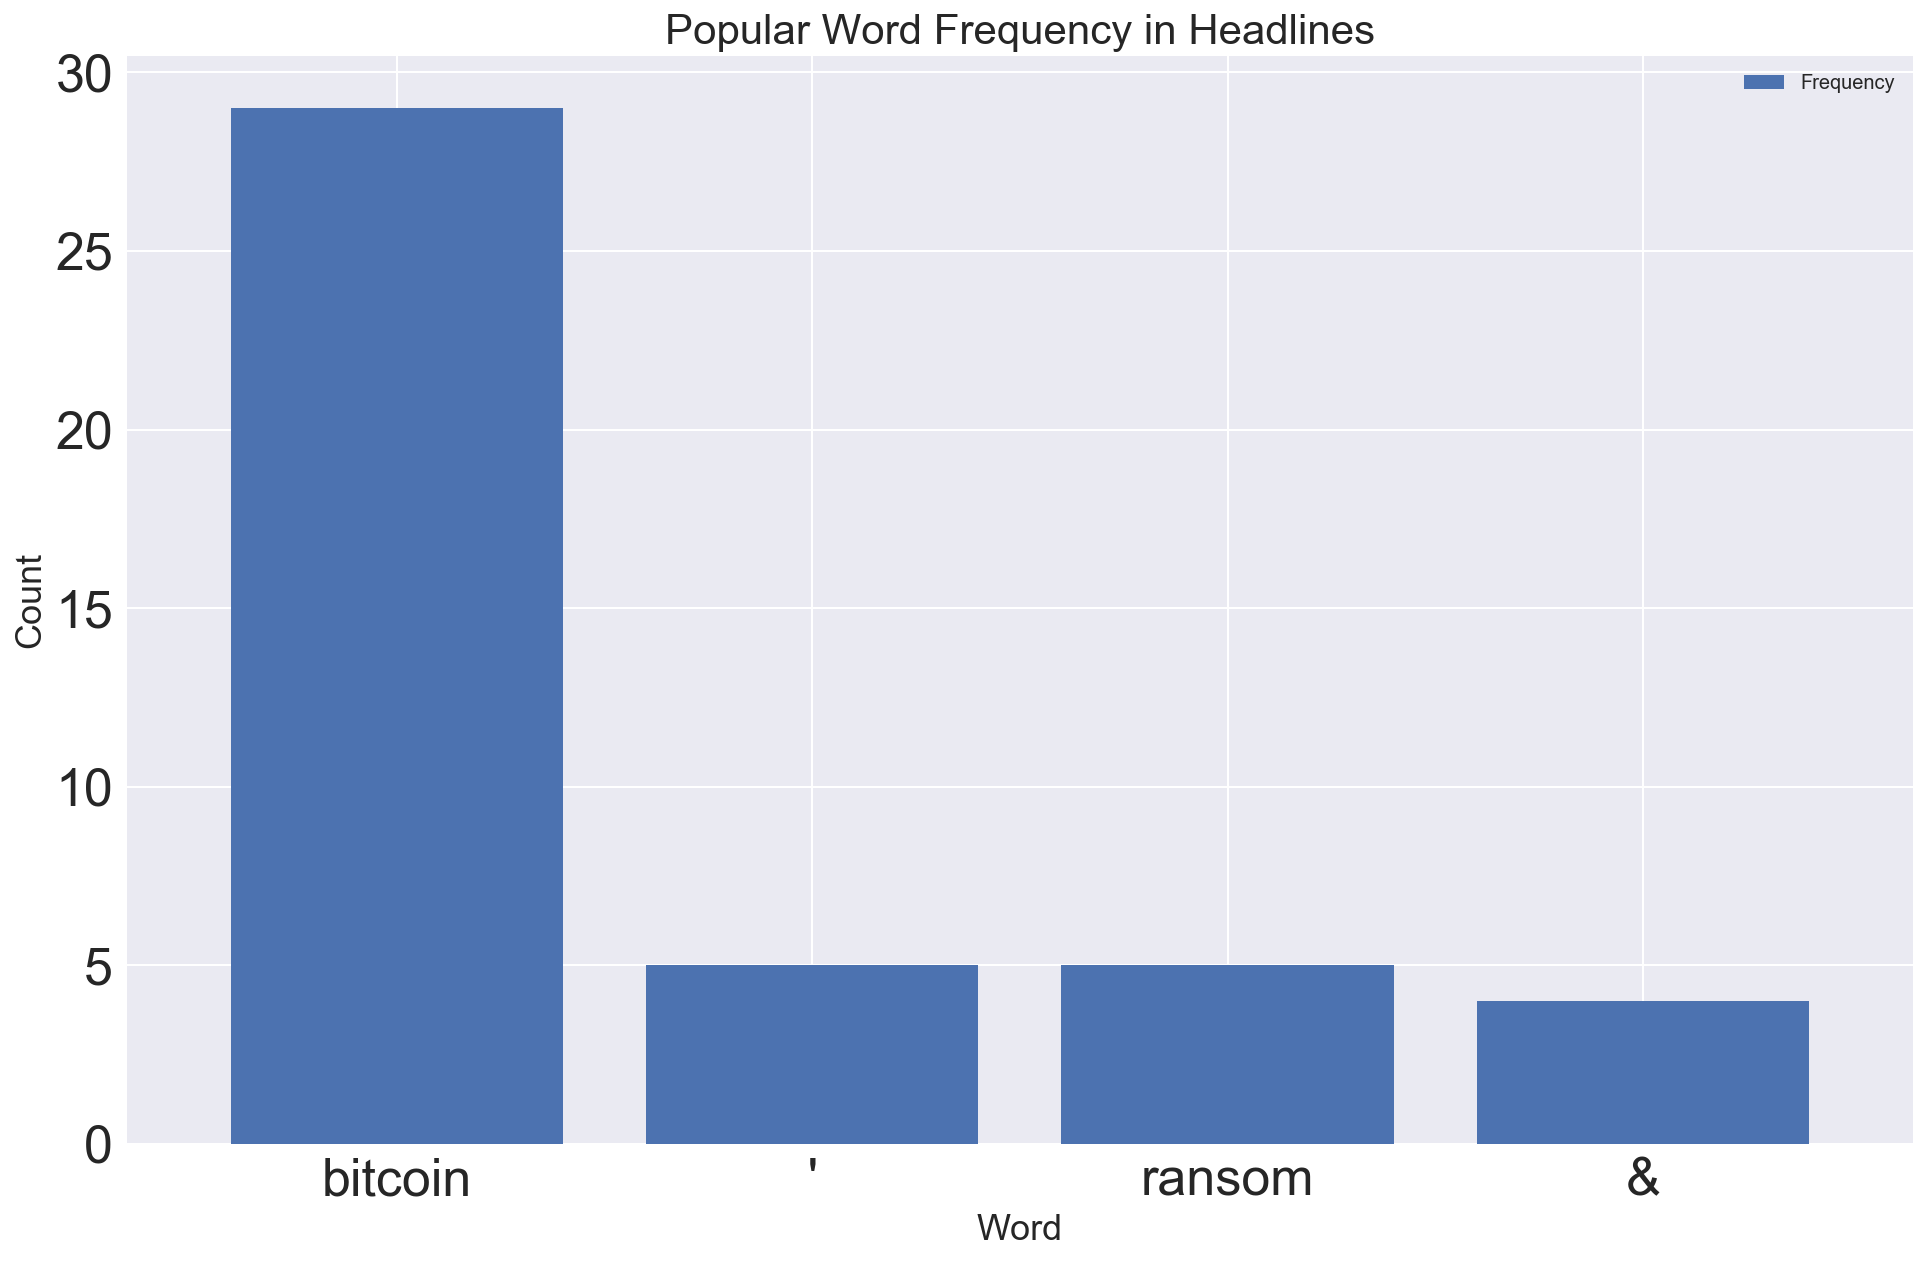

In [131]:
stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df.HEADLINE
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

plt.xlabel('Word', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Popular Word Frequency in Headlines', fontsize=21)

In [129]:
df[df['HEADLINE'].str.contains("ransom")]

,BYLINE,DATE,YEAR,DAY,HEADLINE,LENGTH,PUBLICATION,SECTION,CITY
32,Laura Italiano,2017-08-06,2017,Sunday,"Twisted Internet lure, suitcase kidnap and ran...",1014 words,The New York Post,Metro; Pg. 4,NYC
33,Laura Italiano,2017-08-06,2017,Sunday,"Twisted Internet lure, duffle bag kidnap and r...",1028 words,The New York Post,Sports+Late City Final; Pg. 4,NYC
45,Danika Fears,2017-05-13,2017,Saturday,Global hack attack Data ransom woe,347 words,The New York Post,Late City Final; Pg. 8,NYC
63,Post Staff,2016-02-18,2016,Thursday,Hack attack ransom LA hosp. pays $17K,442 words,The New York Post,Sports+Late City Final; Pg. 27,NYC
